In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import math
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn import metrics
from random import shuffle
import re

In [3]:
from random_dataset import create_random_dataset
from evolutionary_algorithm import EA
from greedy_algorithm import GreedyAlgorithm
from neg_sel import NegativeSelection, load_data

# Languages

## Dataset Creation

In [4]:
char_aminoacids = [
    "_",
    "a",
    "b",
    "c",
    "d",
    "e",
    "f",
    "g",
    "h",
    "i",
    "j",
    "k",
    "l",
    "m",
    "n",
    "o",
    "p",
    "q",
    "r",
    "s",
    "t",
    "u",
    "v",
    "w",
    "x",
    "y",
    "z",
]
allowed = set(char_aminoacids)

In [5]:
languages_data_dir = "./data/languages/"
english_data_dir = languages_data_dir + "english/"
input_path = english_data_dir + "moby_dick.txt"
output_path = english_data_dir + "english_6_train.txt"

with open(input_path, "r", encoding="utf-8") as f:
    text = f.read().lower()

processed = "".join([c if c in allowed else "_" for c in text])

# remove any uncesseary '_' characters
processed = re.sub(r"_+", "_", processed)

length = 6
lines = [processed[i : i + length] for i in range(0, len(processed), length)]

# lines must have character amount equal to length
lines = [line for line in lines if len(line) == length]

with open(output_path, "w", encoding="utf-8") as f:
    f.write("\n".join(lines))

In [10]:
# create test set
import random

languages_data_dir = "./data/languages/"
english_data_dir = languages_data_dir + "english/"
input_path = english_data_dir + "bible.txt"
output_path = english_data_dir + "english_6_test.txt"

with open(input_path, "r", encoding="utf-8") as f:
    text = f.read().lower()

processed = "".join([c if c in allowed else "_" for c in text])

# remove any uncesseary '_' characters
processed = re.sub(r"_+", "_", processed)

length = 6
lines = [processed[i : i + length] for i in range(0, len(processed), length)]

# lines must have character amount equal to length
lines = [line for line in lines if len(line) == length]

sample_size = 2000
sampled_lines = random.sample(lines, sample_size)

with open(output_path, "w", encoding="utf-8") as f:
    f.write("\n".join(sampled_lines))

In [26]:
# Create more test sets
import os

languages_other_data_dir = "./data/languages/other/"

sample_size = 2000

for filename in os.listdir(languages_other_data_dir):
    if filename.endswith(".txt"):
        input_path = os.path.join(languages_other_data_dir, filename)
        base, ext = os.path.splitext(filename)
        output_filename = f"{base}_test{ext}"
        output_path = os.path.join(languages_other_data_dir, output_filename)

        with open(input_path, "r", encoding="utf-8") as f:
            text = f.read().lower()
        processed = "".join([c if c in allowed else "_" for c in text])
        processed = re.sub(r"_+", "_", processed)
        lines = [processed[i : i + length] for i in range(0, len(processed), length)]
        lines = [line for line in lines if len(line) == length]

        if len(lines) < sample_size:
            print(f"Not enough lines in {filename} with only {len(lines)}")
            continue

        sampled_lines = random.sample(lines, sample_size)

        with open(output_path, "w", encoding="utf-8") as f:
            f.write("\n".join(sampled_lines))

# Language Discrimination

In [6]:
english_train_path = english_data_dir + "english_6_train.txt"
self_english_data = pd.read_csv(english_train_path, header=None)

sampled_english_data = create_random_dataset(df=self_english_data, n=10000, seed=42)
sampled_english_data = sampled_english_data[0].to_list()

len(sampled_english_data)

10000

## Greedy Algorithm 

In [19]:
amino_acids = "_abcdefghijklmnopqrstuvwxyz"

motifs = ["".join(motif) for motif in product(amino_acids, repeat=6)]

print(f"Total number of motifs: {len(motifs)}")

Total number of motifs: 387420489


In [20]:
num_sampled_motifs = math.ceil(len(motifs) * 0.01)
sampled_motifs = random.sample(motifs, num_sampled_motifs)

In [ ]:
greedy_optimizer = GreedyAlgorithm(peptides=sampled_english_data, motifs=sampled_motifs, t=3, seed=42)
optimized_dataset = greedy_optimizer.run()

with open(english_data_dir + "greedy_english_10000_1.txt", "w") as f:
    for item in optimized_dataset:
        f.write(f"{item}\n")

print(f"Size of greedily optimized data set: {len(optimized_dataset)}")

test12
Size of greedily optimized data set: 3574


## Random Sampling

In [12]:
random_dataset = create_random_dataset(df=self_english_data[:10000], n=3600, seed=42)

random_dataset_list = random_dataset[0].to_list()
random_dataset_list

['g_bed_',
 'nd_of_',
 'and_jo',
 'd_desi',
 'ing_no',
 'chor_s',
 'aco_wh',
 'attres',
 'small_',
 '_needl',
 'r_coff',
 'were_r',
 'ump_ag',
 'yond_m',
 '_indee',
 '_liabl',
 'loys_t',
 '_skyla',
 'ort_or',
 'thank_',
 'arpoon',
 'ent_wh',
 'ittle_',
 'from_s',
 'it_of_',
 'asantl',
 's_proc',
 'nty_gr',
 'ng_lik',
 '_done_',
 'tter_s',
 'ness_a',
 'nder_t',
 '_was_n',
 'f_him_',
 'rs_tha',
 'come_j',
 'of_a_d',
 'h_it_w',
 'parade',
 '_some_',
 'he_wat',
 'with_h',
 'e_the_',
 'sounds',
 'rld_it',
 '_have_',
 '_nervo',
 'being_',
 '_stree',
 'ed_and',
 'lookin',
 'ould_a',
 '_ee_be',
 '_poor_',
 'ng_int',
 'gainst',
 'o_curt',
 'came_t',
 'les_al',
 'e_been',
 'n_deli',
 'ought_',
 'preven',
 'sfacti',
 'uldn_t',
 'outer_',
 'd_hand',
 'e_slep',
 't_poor',
 'm_into',
 'why_di',
 'ere_pl',
 'feet_o',
 'her_th',
 '_be_af',
 'es_to_',
 'in_my_',
 '_when_',
 'ber_mu',
 'n_roun',
 'a_salt',
 'r_but_',
 'ney_wi',
 'ool_as',
 'be_in_',
 'y_besm',
 'here_a',
 '_lost_',
 'the_la',
 'ese_co',

In [13]:
with open("./data/languages/english/english_6_random.txt", "w") as f:
    for item in random_dataset_list:
        f.write(f"{item}\n")

## Improved Evolutionary Algorithm

Counting frequencies per position
COnverting counts to frequencies
Computing aa frequencies
Compute features
Scaling
Count exchangeability
Running EA
Gen 1: Best = -0.07009809344700446, Avg = 0.0028065277597082196
Gen 101: Best = -0.2013898065374451, Avg = -0.16746752458705444
Gen 201: Best = -0.20798201189522203, Avg = -0.18014023331412726
Gen 301: Best = -0.21812820254840004, Avg = -0.18948697309335338
Gen 401: Best = -0.206757986715235, Avg = -0.18190499002418373


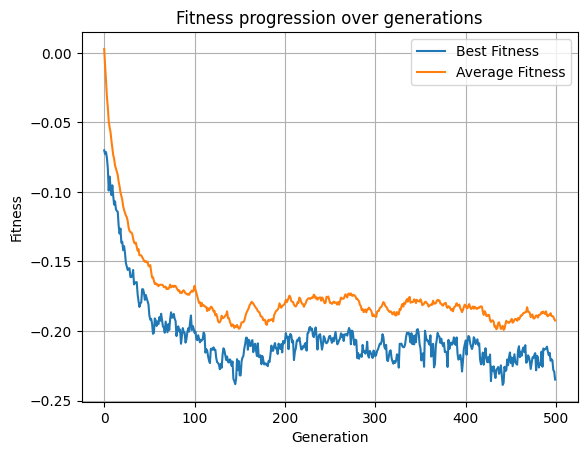

['ds_pac',
 'me_dur',
 'appals',
 'rofund',
 'g_a_su',
 '_malle',
 'roic_n',
 'in_lan',
 'he_whi',
 'ur_duf',
 'concer',
 'e_spou',
 's_the_',
 'format',
 '_whale',
 'ush_of',
 'he_wen',
 '_sligh',
 '_appro',
 '_the_m',
 'ineveh',
 '_the_p',
 'gy_jac',
 'on_fro',
 'e_acco',
 'nd_wer',
 'm_him_',
 'putati',
 '_holes',
 'it_not',
 '_brain',
 'orth_t',
 'but_co',
 'some_l',
 'ghed_a',
 'holdin',
 'to_hav',
 's_and_',
 'retiri',
 'd_knee',
 'other_',
 'ou_wou',
 'usly_s',
 'ns_wit',
 'en_in_',
 '_viney',
 'y_call',
 'orecas',
 '_t_ye_',
 'when_t',
 'we_whe',
 '_word_',
 'ilario',
 'ot_som',
 '_satis',
 'pany_t',
 '_what_',
 'malign',
 '_eggs_',
 '_out_t',
 've_the',
 'mined_',
 'his_wi',
 'withou',
 'rung_a',
 'yrian_',
 'pequod',
 'dings_',
 'ss_to_',
 'for_i_',
 'of_his',
 'f_the_',
 'rld_se',
 '_pierc',
 'hale_w',
 'ry_whi',
 'ntucke',
 'ing_is',
 '_since',
 'ls_but',
 'genial',
 'ngly_i',
 'ldad_c',
 'ased_t',
 'ombard',
 'figure',
 'ny_dam',
 'my_min',
 'the_bo',
 'their_',
 'on_its',

In [ ]:
english_text = self_english_data[0].tolist()  # [0:200] test
shuffle(english_text)
english_text = english_text[:10000]
text_length = len(english_text[0])

position_counts = [defaultdict(int) for _ in range(text_length)]

# count frequencies per position
print("Counting frequencies per position")
for text in english_text:
    for i, aa in enumerate(text):
        position_counts[i][aa] += 1

# convert counts to frequencies
print("COnverting counts to frequencies")
position_freqs = []
for pos in position_counts:
    total = sum(pos.values())
    pos_freq = {aa: count / total for aa, count in pos.items()}
    position_freqs.append(pos_freq)


def compute_Fpep(peptide):
    return sum(position_freqs[i].get(aa, 0) for i, aa in enumerate(peptide))


def compute_aa_frequency_scores(peptides):
    aa_counts = defaultdict(int)
    total_aa = 0

    for p in peptides:
        for aa in p:
            aa_counts[aa] += 1
            total_aa += 1

    aa_freqs = {aa: count / total_aa for aa, count in aa_counts.items()}

    def score(peptide):
        return sum(aa_freqs[aa] for aa in peptide)

    return [score(p) for p in peptides]


print("Computing aa frequencies")
aa_freq_scores = compute_aa_frequency_scores(english_text)

print("Compute features")
feature_vectors: list[list[int | float]] = []
for i, text in enumerate(english_text):
    fpep = compute_Fpep(text)
    aa = aa_freq_scores[i]
    feature_vectors.append([fpep, aa])

print("Scaling")
scaler = StandardScaler()
feature_vectors = scaler.fit_transform(feature_vectors)


def affinity(motif: str, peptide: str) -> int:
    max_adjacent = 0
    current = 0
    for m, p in zip(motif, peptide):
        if m == p:
            current += 1
            if current > max_adjacent:
                max_adjacent = current
        else:
            current = 0
    return max_adjacent


def compute_exchangeability(subset_peptides, t):
    n = len(subset_peptides)
    scores = np.zeros(n, dtype=int)

    for i in range(n):
        for j in range(n):
            if i != j and affinity(subset_peptides[i], subset_peptides[j]) >= t:
                scores[i] += 1

    return scores


t = 3  # threshold affinity
print("Count exchangeability")
raw_exchangeability_scores = compute_exchangeability(english_text, t).reshape(-1, 1)
global_exchangeability_scores = scaler.fit_transform(raw_exchangeability_scores).flatten()


# exchangeability_mean_global = np.mean(compute_exchangeability(peptides, t))
def composite_fitness(indices):
    subset_vectors = feature_vectors[indices]

    fpep_mean = np.mean(subset_vectors[:, 0])
    aa_mean = np.mean(subset_vectors[:, 1])

    exchangeability_scores = [global_exchangeability_scores[i] for i in indices]  # get all scores of the indices
    exchangeability_mean = np.mean(exchangeability_scores)

    return 1 * fpep_mean + 1 * aa_mean + 1 * exchangeability_mean


print("Running EA")
m_ea = EA(data=feature_vectors, N=100, sigma=3574, K=2, p=0.1, mu=0.02, T=500, f=composite_fitness, seed=42)
multi_best_individual, multi_best_fitness, multi_fitness_avg, multi_fitness_best = m_ea.run()

plt.plot(multi_fitness_best, label="Best Fitness")
plt.plot(multi_fitness_avg, label="Average Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness progression over generations")
plt.legend()
plt.grid(True)
plt.show()

multi_optimal_peptides = [english_text[i] for i in multi_best_individual]
multi_optimal_peptides

In [18]:
print(len(multi_optimal_peptides))

3574


In [15]:
with open("./data/languages/english/english_6_ea_110.txt", "w") as f:
    for item in multi_optimal_peptides:
        f.write(f"{item}\n")

## Negative Selection

In [16]:
normal_path = "./data/languages/english/english_6_test.txt"
anomalous_path = "./data/languages/other/hiligaynon_test.txt"
result_path = "./data/languages/results/"

languages = ["hiligaynon", "latin", "middle_english", "plautdietsch", "tagalog", "xhosa"]
# languages = ["latin", "middle_english", "plautdietsch", "tagalog"]

r_start = 1
r_stop = 6

ns = NegativeSelection(
    "/data/languages/english.alpha",
    "./data/languages/english/english_6_ea_110.txt",
    r_start=r_start,
    r_stop=r_stop,
    n=6,
)

In [17]:
ns.run(normal_path, result_path, "ea_110")

In [ ]:
for language in languages:
    anomalous_path = "./data/languages/other/" + language + "_test.txt"
    ns.run(anomalous_path, result_path, "ea_110")

### Calculate metrics of negative selection

In [12]:
def preprocess_data(data: pd.DataFrame, r: int):
    anomalous_data = data[data["anomalous"] == 1]
    sensitivity = len(anomalous_data[anomalous_data["score"] > r]) / len(anomalous_data)

    non_anomalous_data = data[data["anomalous"] == 0]
    specificity = len(non_anomalous_data[non_anomalous_data["score"] < r]) / len(non_anomalous_data)

    data["y"] = data["score"] > r

    return anomalous_data, non_anomalous_data, data


def caclulate_roc_auc(data):
    fpr, tpr, thresholds = metrics.roc_curve(data["anomalous"], data["score"])
    auc = metrics.roc_auc_score(data["anomalous"], data["score"])
    roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)

    return auc, roc

#### Roc plots

/home/vaggelis_spithas/Documents/ru/naco/projects/NaCo_Project/.naco310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vaggelis_spithas/Documents/ru/naco/projects/NaCo_Project/.naco310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vaggelis_spithas/Documents/ru/naco/projects/NaCo_Project/.naco310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division`

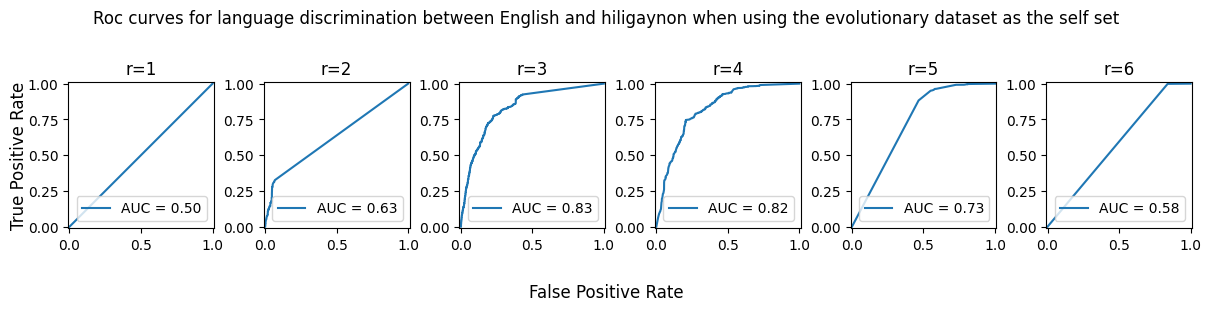

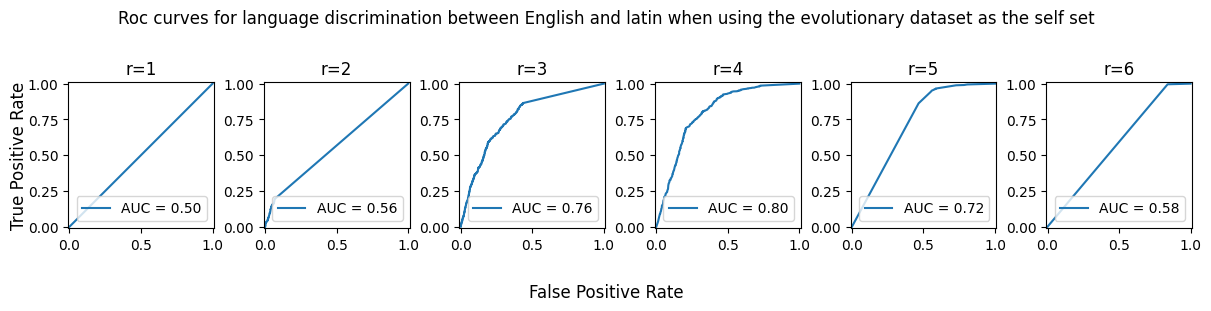

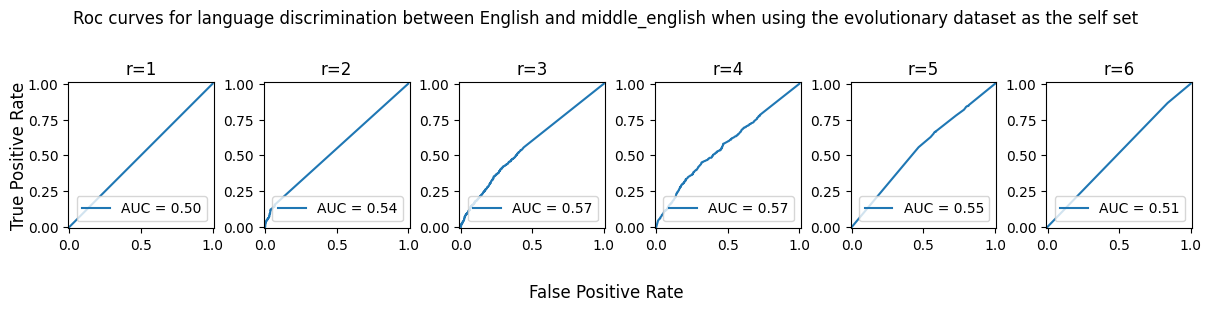

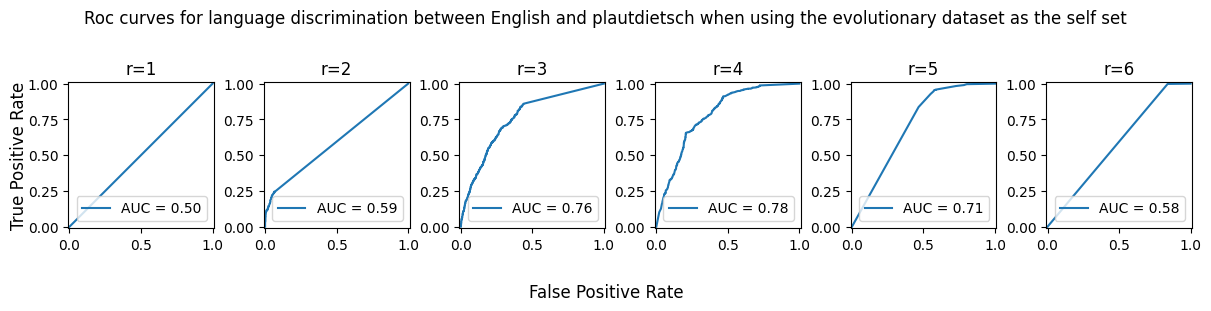

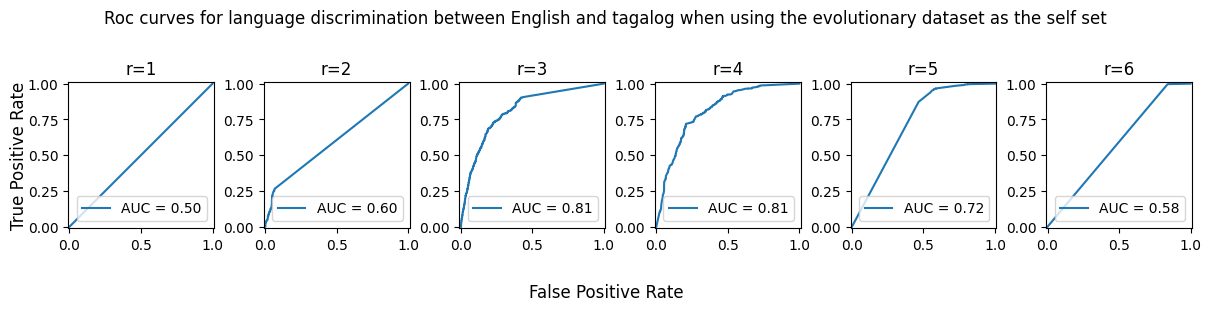

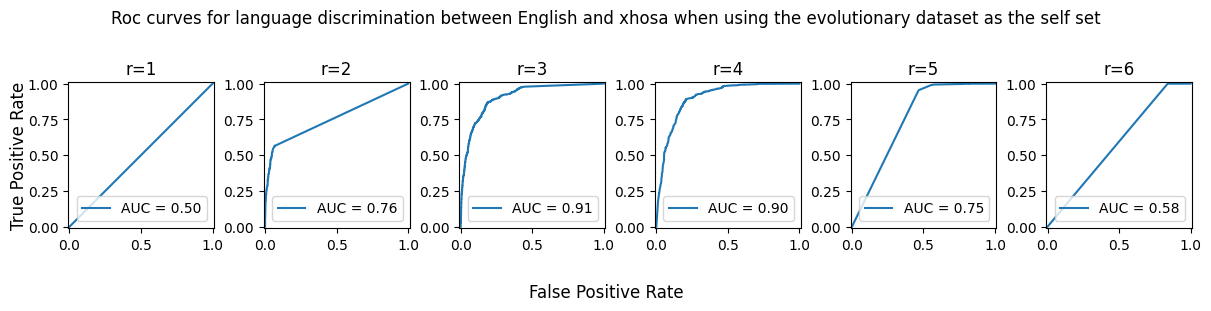

In [ ]:
pd.set_option("future.no_silent_downcasting", True)  # opt-in for future behavior of replace

r_start = 1
r_stop = 6
normal_path = "./data/languages/english/english_6_test.txt"
result_path = "./data/languages/results/"

for language in languages:
    anomalous_path = "./data/languages/other/" + language + "_test.txt"

    fig, ax = plt.subplots(1, r_stop, figsize=(12, 3), constrained_layout=True)
    fig.suptitle(
        f"Roc curves for language discrimination between English and {language} when using the evolutionary dataset as the self set"
    )
    fig.supxlabel("False Positive Rate")
    fig.supylabel("True Positive Rate")

    acc_list = []
    err_rate_list = []
    f1_list = []
    precision_list = []
    recall_list = []

    for r in range(r_start, r_stop + 1):
        anomalous_data = load_data(anomalous_path, r, result_path, 1, "ea_110")
        normal_data = load_data(normal_path, r, result_path, 0, "ea_110")
        data = pd.concat([anomalous_data, normal_data])

        _, _, data = preprocess_data(data, r)
        # display(data.head())

        auc, roc = caclulate_roc_auc(data)
        axis = ax[r - 1]
        roc.plot(ax=axis)
        axis.set_xlabel("")
        axis.set_ylabel("")
        axis.set_title(f"r={r}")

        plot_path = f"./report/images/{language}_ea_110.png"
        fig.savefig(plot_path)

        y_true = data["anomalous"].to_list()
        y_pred = data["y"].replace({True: 1, False: 0}).to_list()
        acc = metrics.accuracy_score(y_true, y_pred)
        err_rate = 1 - acc

        f1 = metrics.f1_score(y_true, y_pred)
        precision = metrics.precision_score(y_true, y_pred)
        recall = metrics.recall_score(y_true, y_pred)

        acc_list.append(acc)
        err_rate_list.append(err_rate)
        f1_list.append(f1)
        precision_list.append(precision)
        recall_list.append(recall)

#### Accuracy and Error Rate plots

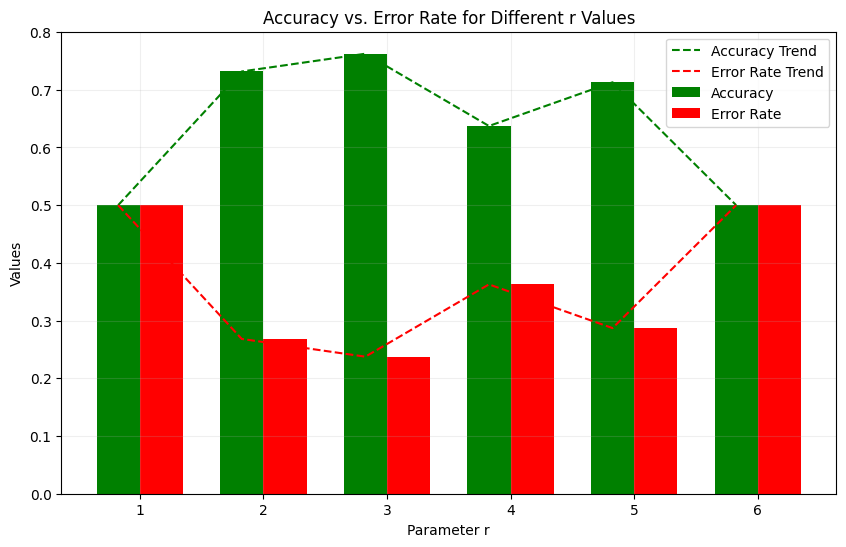

In [14]:
r_values = [r for r in range(r_start, r_stop + 1)]
bar_width = 0.35
x = np.arange(len(r_values))

plt.figure(figsize=(10, 6))

plt.bar(x, acc_list, bar_width, label="Accuracy", color="green")
plt.bar(x + bar_width, err_rate_list, bar_width, label="Error Rate", color="red")

# Add trend lines for accuracy and error rates
# Use moving average for the trend line (smooth line)
window = 1  # Number of points to average over
accuracy_trend = np.convolve(acc_list, np.ones(window) / window, mode="valid")
error_trend = np.convolve(err_rate_list, np.ones(window) / window, mode="valid")

plt.plot(x[window - 1 :], accuracy_trend, "g--", label="Accuracy Trend")
plt.plot(x[window - 1 :], error_trend, "r--", label="Error Rate Trend")

plt.xlabel("Parameter r")
plt.ylabel("Values")
plt.title("Accuracy vs. Error Rate for Different r Values")
plt.xticks(x + bar_width / 2, r_values)  # Center the x-tick labels
plt.legend()
plt.grid(True, alpha=0.2)

plt.show()

#### F1, Precision and Recall Plots

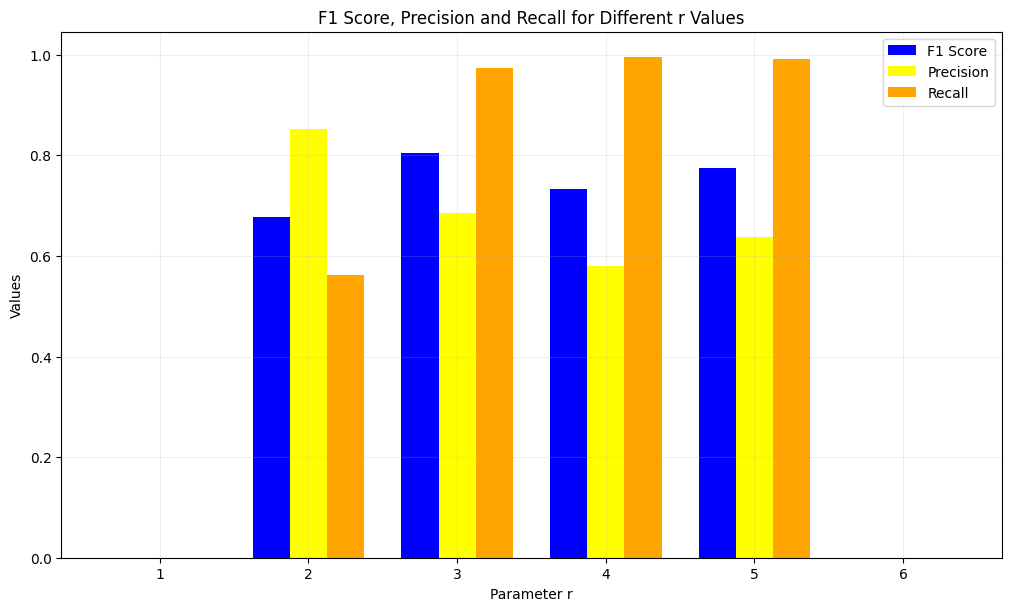

In [15]:
bar_width = 0.25

# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(layout="constrained", figsize=(10, 6))

ax.bar(x, f1_list, bar_width, label="F1 Score", color="blue")
ax.bar(x + bar_width, precision_list, bar_width, label="Precision", color="yellow")
ax.bar(x + 2 * bar_width, recall_list, bar_width, label="Recall", color="orange")


ax.set_xlabel("Parameter r")
ax.set_ylabel("Values")
ax.set_title("F1 Score, Precision and Recall for Different r Values")
ax.legend()
ax.set_xticks(x + bar_width, r_values)
ax.grid(True, alpha=0.2)

plt.show()